# Credit Risk Analysis and Modeling

# 1.Introduction to dataset

The Statlog (German Credit Data) data set is a commonly used data set for modeling credit risk analysis. It contains data on 1,000 loan applicants from a German bank, and the objective is to predict whether an applicant is a good or bad credit risk based on various attributes such as their credit history, employment status, and personal information.

The dataset has 9 input attributes such as credit history, purpose of the loan, personal status and sex, property status and housing type, employment status, age, and others, and one target attribute which is binary indicating whether the credit risk is good or bad.

The dataset has been preprocessed and normalized, with categorical variables converted to numerical values, and missing values handled accordingly.

The Statlog (German Credit Data) data set has been widely used for building models for risk analysis, credit scoring, and decision-making systems in banking and finance. Many classification algorithms, such as logistic regression, decision trees, and neural networks have been applied to this dataset, and it has become a standard benchmark for evaluating the performance of different models in the context of credit risk analysis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

## 2.Loading and understanding dataset  

In [2]:
df = pd.read_csv('credit_data.csv', index_col=0)
df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [4]:
df.isnull().sum()

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0
Risk,0


There are missing values in columns "Saving accounts" and "Checking accounts".

Explore the Values of Text Columns

In [5]:
cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']
for col in cols:
    line = "**" + col + ":** "
    for v in df[col].unique():
        line = line + str(v) + ", "
    display(Markdown(line))


**Sex:** male, female, 

**Housing:** own, free, rent, 

**Saving accounts:** nan, little, quite rich, rich, moderate, 

**Checking account:** little, moderate, nan, rich, 

**Purpose:** radio/TV, education, furniture/equipment, car, business, domestic appliances, repairs, vacation/others, 

**Risk:** good, bad, 

From above exploration:

Columns "Housing", "Saving accounts" and "Checking accounts" are **Ordinal** data.\
Columns "Sex", "Purpose" and "Risk" are **Categorical** data.

# 3.Data Pre-processing For Ordinal Columns

In [6]:
# label enncode account quality and fill NaN with 0
def SC_LabelEncoder(text):
  if text == 'little':
    return 1
  elif text == 'moderate':
    return 2
  elif text == 'quite rich':
    return 3
  elif text == 'rich':
    return 4
  else:
    return 0

df['Saving accounts'] = df['Saving accounts'].apply(SC_LabelEncoder)
df['Checking account'] = df['Checking account'].apply(SC_LabelEncoder)

In [7]:
# label enncode account quality and fill NaN with 0
def Housing_LabelEncoder(text):
  if text == 'free':
    return 1
  elif text == 'rent':
    return 2
  elif text == 'own':
    return 3
  else:
    return 0

df['Housing'] = df['Housing'].apply(Housing_LabelEncoder)

# 4.EDA

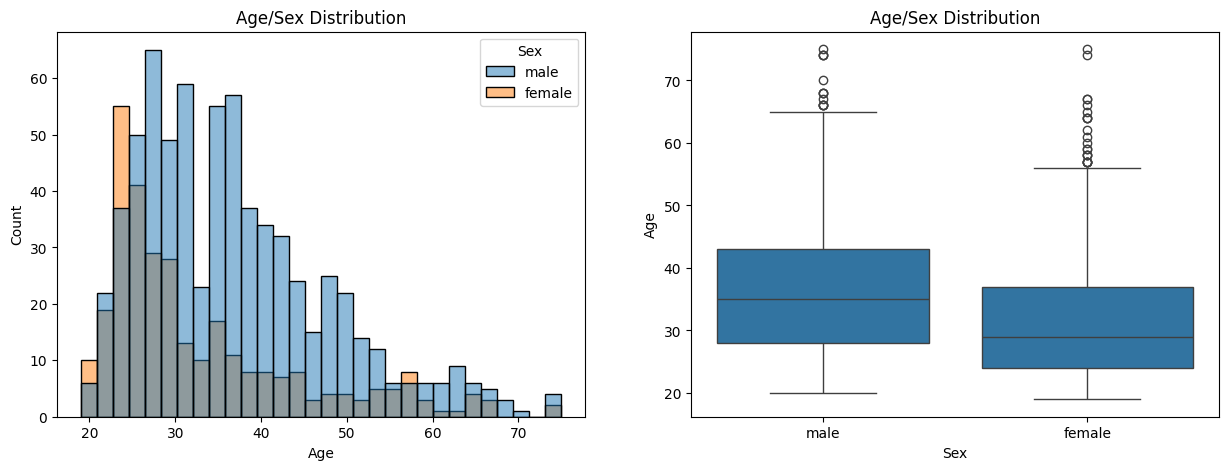

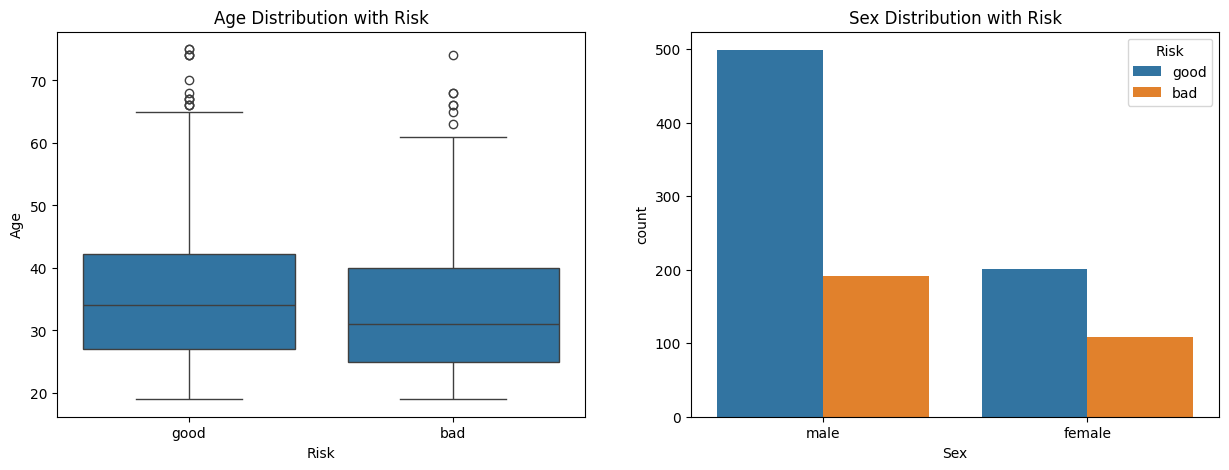

In [8]:
# Convert infinite values to NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df, x='Age', bins=30, hue="Sex", ax=ax[0]).set_title("Age/Sex Distribution");
sns.boxplot(data=df, x="Sex", y="Age", ax=ax[1]).set_title("Age/Sex Distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df, x='Risk', y='Age', ax=ax[0]).set_title("Age Distribution with Risk");
sns.countplot(data=df, x="Sex", hue="Risk", ax=ax[1]).set_title("Sex Distribution with Risk");

**Analysis:**

+ Age does not affect the risk rating much.
+ Males take more count of credit from Bank.
+ Males have lower percentage of bad rating than woman.

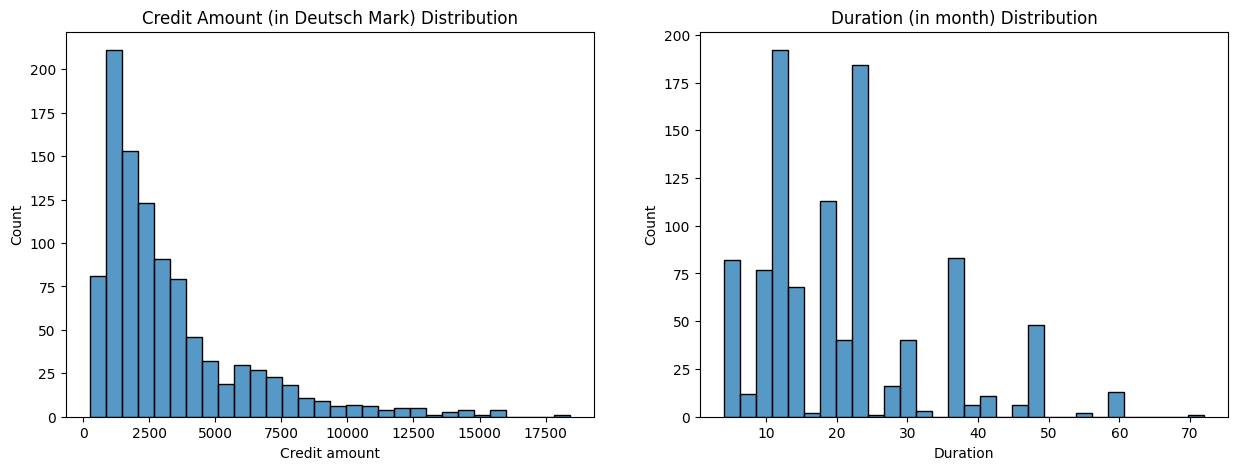

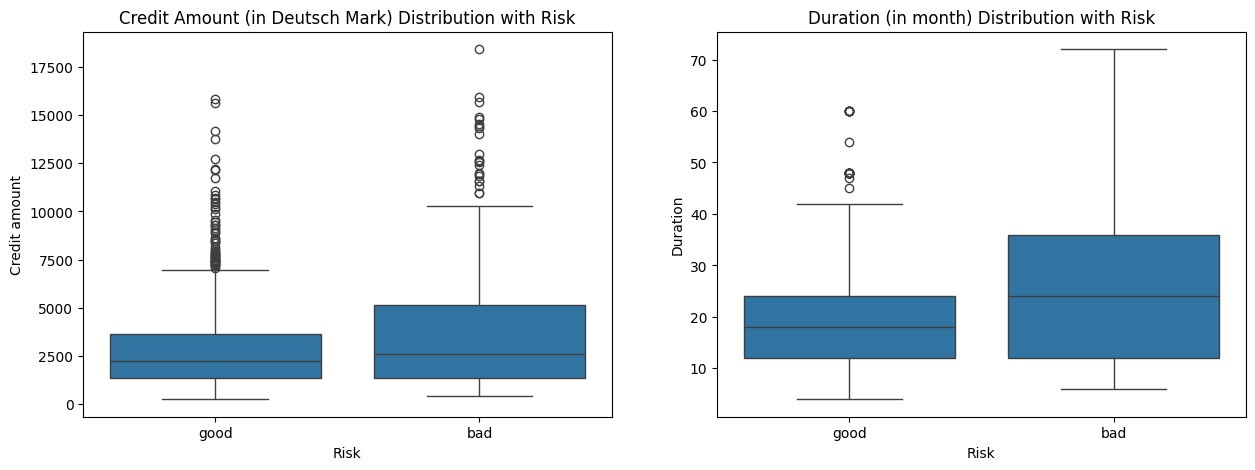

In [9]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df, x='Credit amount', bins=30, ax=ax[0]).set_title("Credit Amount (in Deutsch Mark) Distribution");
sns.histplot(df, x='Duration', bins=30, ax=ax[1]).set_title("Duration (in month) Distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df, x='Risk', y='Credit amount', ax=ax[0]).set_title("Credit Amount (in Deutsch Mark) Distribution with Risk");
sns.boxplot(data=df, x='Risk', y='Duration', ax=ax[1]).set_title("Duration (in month) Distribution with Risk");

**Analysis**
+ German Credit Amount is concentrated in the range of 2500 and below
+ Duration is concentrated in the range of 10 months and 20 months
+ Higher credit amount and longer means high risk to the bank


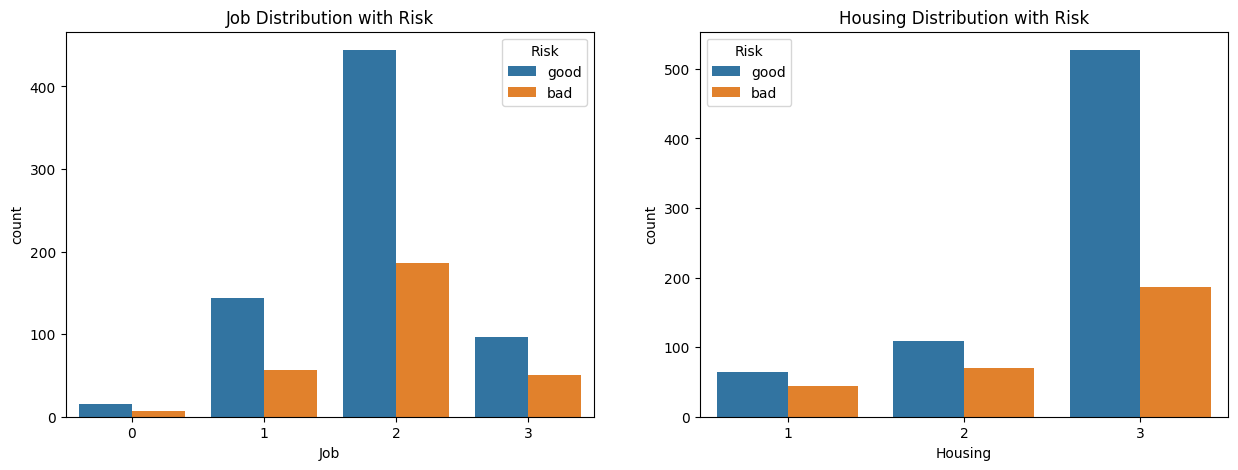

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df, x="Job", hue="Risk", ax=ax[0]).set_title("Job Distribution with Risk");
sns.countplot(data=df, x="Housing", hue="Risk", ax=ax[1]).set_title("Housing Distribution with Risk");


**Analysis**
+ Most of people in records have job skill level 2, but the job skill level does not affect the risk rating much.
+ People who own a house means low risk and good rating to the bank.

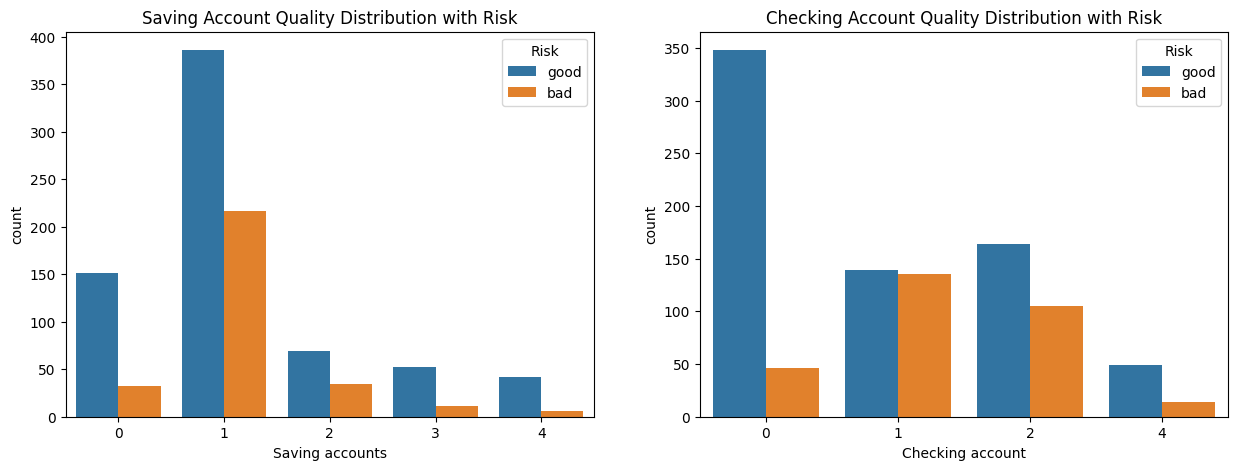

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df, x="Saving accounts", hue="Risk", ax=ax[0]).set_title("Saving Account Quality Distribution with Risk");
sns.countplot(data=df, x="Checking account", hue="Risk", ax=ax[1]).set_title("Checking Account Quality Distribution with Risk");

**Analysis:**
+ People with more savings are less risky to banks, but most people don't have much savings
+ About half of people with little checking accounts are considered bad in risk
+ About 20% of people who have moderate checking account are considered as bad rating in risk.

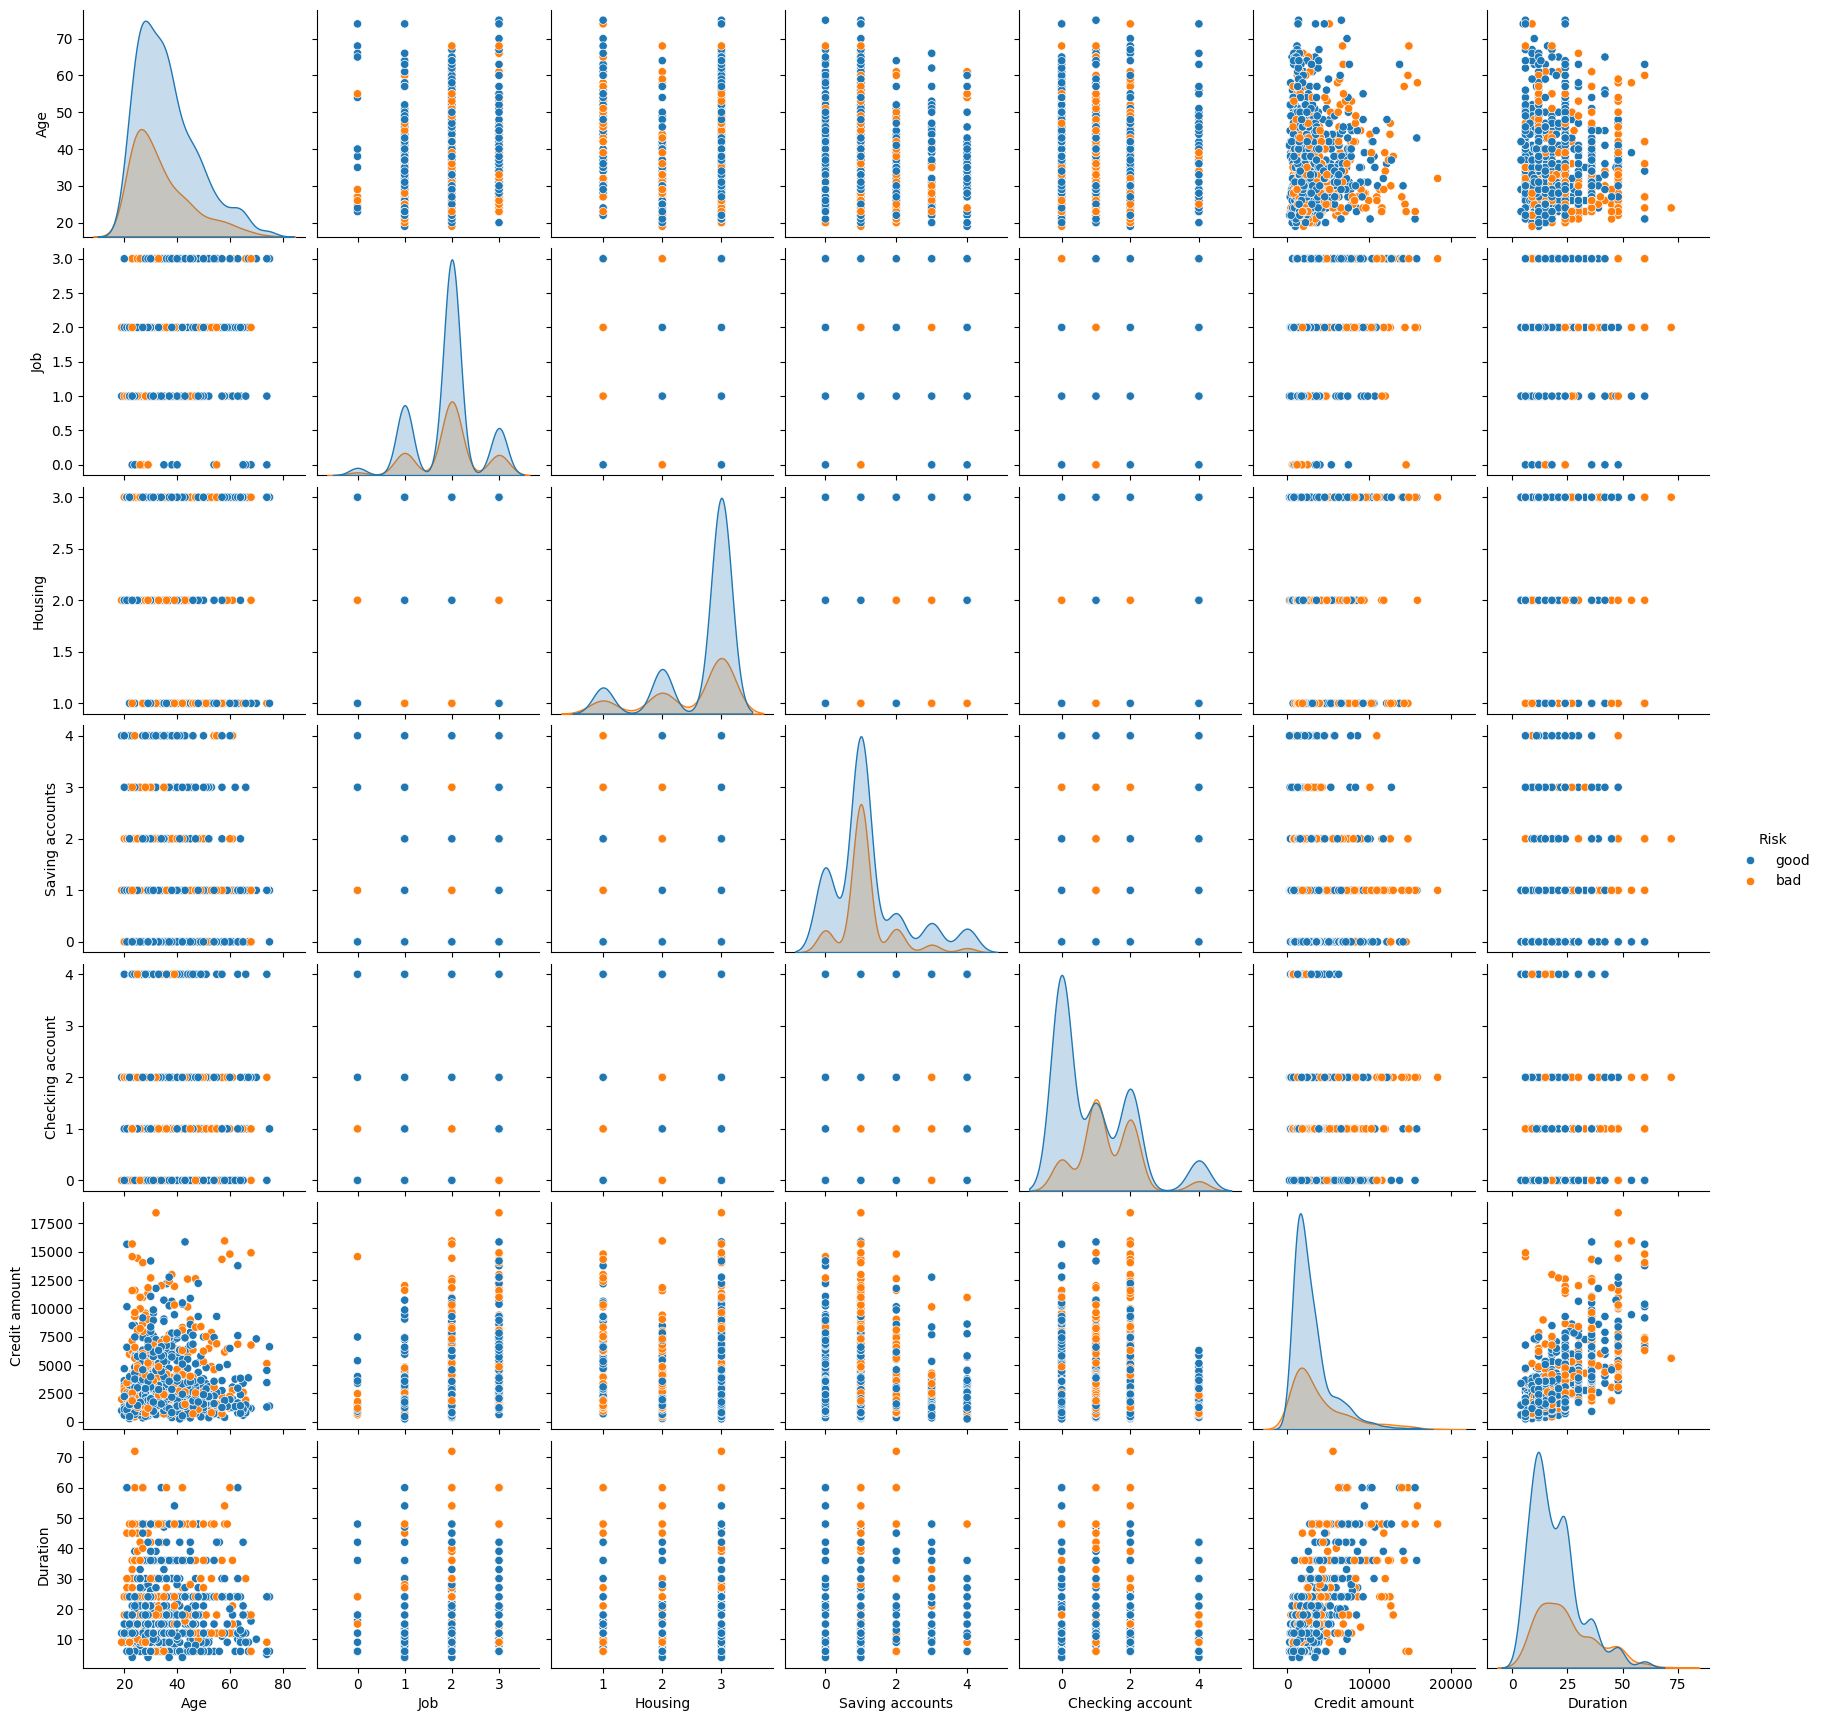

In [12]:
sns.pairplot(df[['Age', 'Job', 'Housing', 'Saving accounts',
                 'Checking account', 'Credit amount', 'Duration', "Risk"]], hue="Risk");

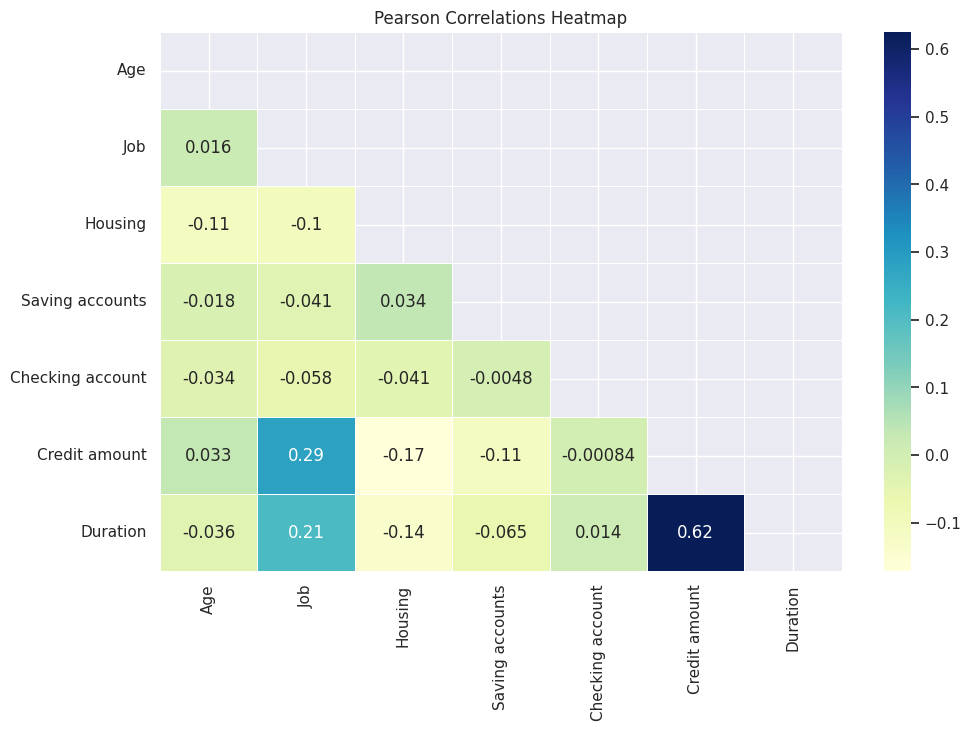

In [13]:
corr = df[['Age', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration']].corr()
sns.set(rc={'figure.figsize':(11,7)})
sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype="bool")))\
    .set_title("Pearson Correlations Heatmap");

**Analysis**: The Credit Amount is HIGHLY and POSITIVELY related to the Duration.

In [14]:
df["Risk"].value_counts()

,count
Risk,
good,700
bad,300


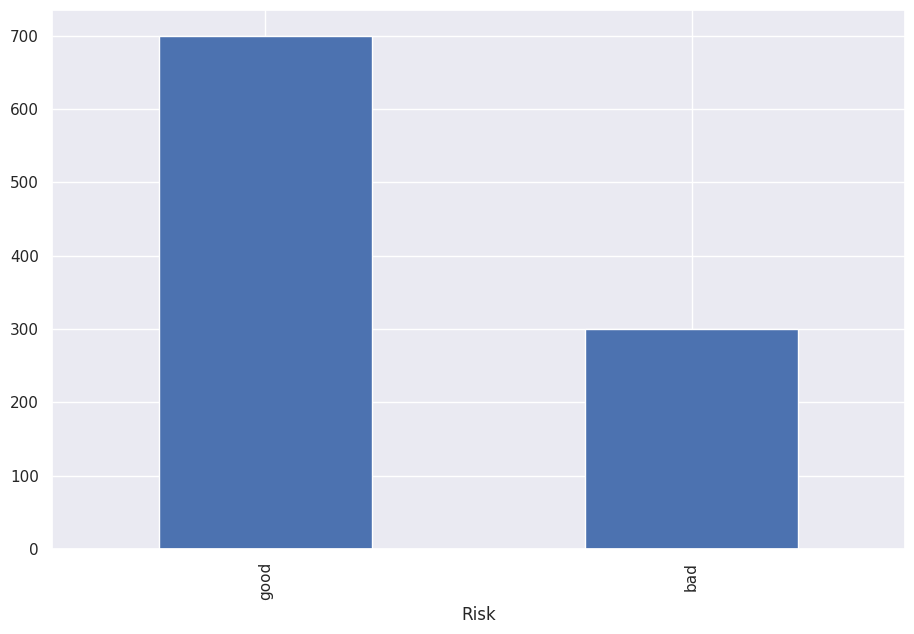

In [15]:
df["Risk"].value_counts().plot(kind= 'bar');

# 5. Data Processing

In [16]:
# labelencoder other categorical columns
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Purpose'] = le.fit_transform(df['Purpose'])
df['Risk']= le.fit_transform(df['Risk'])

In [17]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,3,0,1,1169,6,5,1
1,22,0,2,3,1,2,5951,48,5,0
2,49,1,1,3,1,0,2096,12,3,1
3,45,1,2,1,1,1,7882,42,4,1
4,53,1,2,1,1,1,4870,24,1,0


In [18]:
X,y=df.drop('Risk',axis=1),df['Risk']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=0)


In [19]:
Models = {
    "Logistic": LogisticRegression(),
    "SVC": SVC(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GaussianNaiveBayes": GaussianNB()
}

In [20]:
import pandas as pd
from sklearn import model_selection

cv_results = pd.DataFrame(columns=['model', 'train_score', 'test_score', 'fit_time', 'score_time'])

for key in Models.keys():
    cv_res = model_selection.cross_validate(Models[key], X_train, y_train,
                                            return_train_score=True,
                                            scoring="f1",
                                            cv=5, n_jobs=-1)
    res = {
        'model': key,
        'train_score': cv_res["train_score"].mean(),
        'test_score': cv_res["test_score"].mean(),
        'fit_time': cv_res["fit_time"].mean(),
        'score_time': cv_res["score_time"].mean(),
    }
    cv_results = pd.concat([cv_results, pd.DataFrame([res])], ignore_index=True)
    print("CV for model:", key, "done.")


<ipython-input-20-96ca19c4dd44>:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cv_results = pd.concat([cv_results, pd.DataFrame([res])], ignore_index=True)


CV for model: Logistic done.
CV for model: SVC done.
CV for model: DecisionTree done.
CV for model: RandomForest done.
CV for model: GaussianNaiveBayes done.


In [21]:
cv_results

,model,train_score,test_score,fit_time,score_time
0,Logistic,0.816756,0.813954,0.037284,0.007955
1,SVC,0.826045,0.826072,0.035591,0.012908
2,DecisionTree,1.000000,0.760523,0.007910,0.006618
3,RandomForest,1.000000,0.822631,0.345689,0.027275
4,GaussianNaiveBayes,0.812051,0.811265,0.004822,0.006065



Random Forest Classifier gives a good result on both train_score and test_score. Taking all this into consideration, Random Forest Classifier is chose to evaluate on testing set.

#6.Model

In [53]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(df.iloc[:,:-1], df["Risk"])

In [54]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = model_selection.train_test_split(
    X_smote, y_smote , test_size=0.2, random_state=42)

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [56]:
y_predict = rf.predict(X_test_smote)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test_smote, y_predict))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       131
           1       0.84      0.74      0.79       149

    accuracy                           0.79       280
   macro avg       0.79      0.79      0.79       280
weighted avg       0.80      0.79      0.79       280



In [58]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_smote, y_predict))

[[110  21]
 [ 38 111]]


In [60]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor( )
X_train_smote, X_test_smote, y_train_smote, y_test_smote = model_selection.train_test_split(
    X_smote, y_smote , test_size=0.2, random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)
y_predict = rf.predict(X_test_smote)
from sklearn.metrics import classification_report
print(classification_report(y_test_smote, y_predict))


              precision    recall  f1-score   support

           0       0.74      0.84      0.79       131
           1       0.84      0.74      0.79       149

    accuracy                           0.79       280
   macro avg       0.79      0.79      0.79       280
weighted avg       0.80      0.79      0.79       280



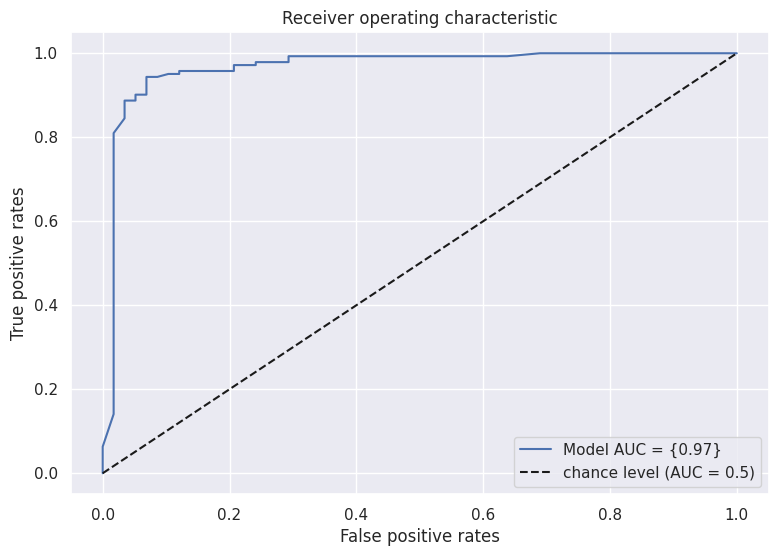

In [62]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
roc_au_s = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr, label="Model AUC = {%.2f}" %roc_au_s)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.title("Receiver operating characteristic")
plt.xlabel("False positive rates")
plt.ylabel("True positive rates")
plt.legend()
plt.show()



In [63]:
feature_importance = pd.DataFrame()
feature_importance["feature"] = X_train.columns
feature_importance["importance"] = rf.feature_importances_  # Cột "importance" được gán giá trị độ quan trọng của đặc trưng, được tính bằng mô hình Random Forest (rf.feature_importances_). Mảng này chứa độ quan trọng của mỗi đặc trưng theo quyết định của mô hình.
feature_importance = feature_importance.sort_values("importance", ascending=False)
feature_importance

,feature,importance
6,Credit amount,0.223788
7,Duration,0.169571
0,Age,0.149788
5,Checking account,0.121190
8,Purpose,0.104756
4,Saving accounts,0.073739
3,Housing,0.067098
2,Job,0.055379
1,Sex,0.034692


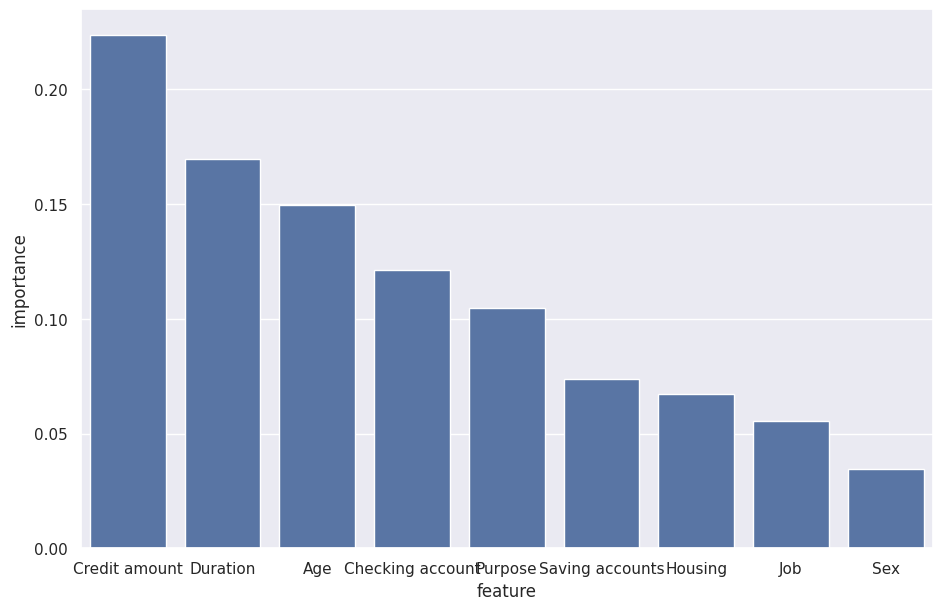

In [64]:
sns.barplot(data=feature_importance, x = "feature", y="importance");